# LowLou

In [ ]:
from setproctitle import setproctitle

setproctitle("LowLou")

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

from zpinn.lowloumag import LowLouMag
from zpinn.pinn_nf2_visualization import draw_grid

In [ ]:
Nx = 512
Ny = 512
Nz = 512

n = 1
m = 1
l = 0.3
Phi = np.pi/3

In [ ]:
input_path = '01_input/lowlou_646464/'
os.makedirs(input_path, exist_ok=True)
vtk_path = os.path.join(input_path, 'b.vtk')
bottom_npy_path = os.path.join(input_path, 'b_bottom.npy')

## Calculate

In [ ]:
lowlou = LowLouMag(bounds=[-1,1,-1,1,0,2], 
              resolutions=[Nx, Ny, Nz], 
              n=n, m=m, l=l, Phi=Phi, 
              abs=True)
lowlou.calculate()
# lowlou.grid.save(vtk_path)

ImageData (0x7fe8bd505960)
  N Cells:      133432831
  N Points:     134217728
  X Bounds:     -1.000e+00, 1.000e+00
  Y Bounds:     -1.000e+00, 1.000e+00
  Z Bounds:     0.000e+00, 2.000e+00
  Dimensions:   512, 512, 512
  Spacing:      3.914e-03, 3.914e-03, 3.914e-03
  N Arrays:     3

In [ ]:
lowlou.grid

ImageData (0x7fe8bd505960)
  N Cells:      133432831
  N Points:     134217728
  X Bounds:     -1.000e+00, 1.000e+00
  Y Bounds:     -1.000e+00, 1.000e+00
  Z Bounds:     0.000e+00, 2.000e+00
  Dimensions:   512, 512, 512
  Spacing:      3.914e-03, 3.914e-03, 3.914e-03
  N Arrays:     3

In [ ]:
from zpinn.pinn_nf2_cleanup import create_coordinates

In [ ]:
b_mesh = lowlou.grid
Nx, Ny, Nz = b_mesh.dimensions
co_bounds = (0, Nx-1, 0, Ny-1, 0, Nz-1)
co_coords = create_coordinates(co_bounds).reshape(-1, 3)
co_coord = co_coords.reshape(Nx, Ny, Nz, 3)
x = co_coord[..., 0]
y = co_coord[..., 1]
z = co_coord[..., 2]
mesh = pv.StructuredGrid(x, y, z)
mesh['B'] = b_mesh['B']
mesh.active_vectors_name = 'B'
mesh['mag'] = b_mesh['mag']
mesh.active_scalars_name = 'mag'

In [ ]:
mesh

StructuredGrid (0x7fe8bd507400)
  N Cells:      133432831
  N Points:     134217728
  X Bounds:     0.000e+00, 5.110e+02
  Y Bounds:     0.000e+00, 5.110e+02
  Z Bounds:     0.000e+00, 5.110e+02
  Dimensions:   512, 512, 512
  N Arrays:     2

In [ ]:
mesh.save(vtk_path)

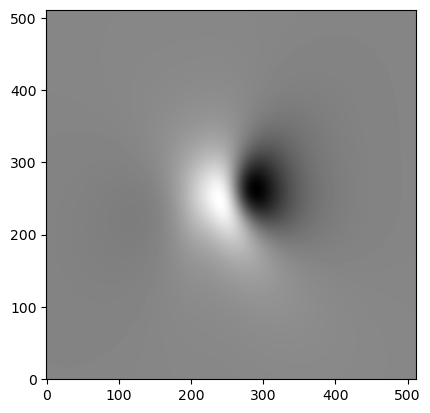

In [ ]:
b_bottom = np.array(lowlou.b_bottom)
plt.imshow(b_bottom[:, :, 2].transpose(), origin='lower', cmap='gray')

with open(bottom_npy_path, 'wb') as f:
        np.save(f, b_bottom)

## Viz

In [ ]:
pv.start_xvfb()
pv.global_theme.trame.server_proxy_enabled = True
pv.set_jupyter_backend('static')

In [ ]:
b_mesh = pv.read(vtk_path)
b_mesh

StructuredGrid (0x7f539a1f20e0)
  N Cells:      2048383
  N Points:     2097152
  X Bounds:     0.000e+00, 1.270e+02
  Y Bounds:     0.000e+00, 1.270e+02
  Z Bounds:     0.000e+00, 1.270e+02
  Dimensions:   128, 128, 128
  N Arrays:     2

In [ ]:
b_grid = draw_grid(b_mesh)

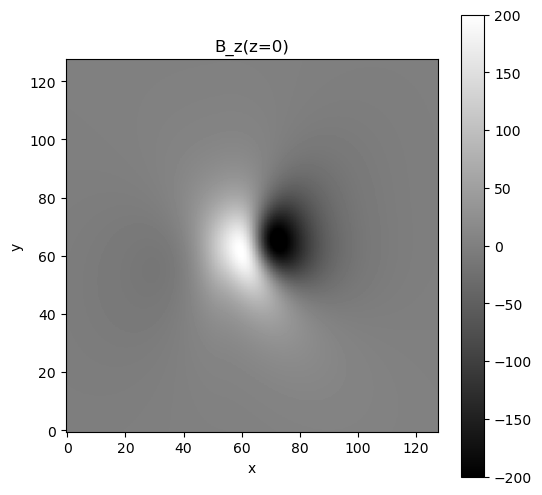

In [ ]:
b_grid.plt_Bz_imshow(z=0, vmin=-200, vmax=200)

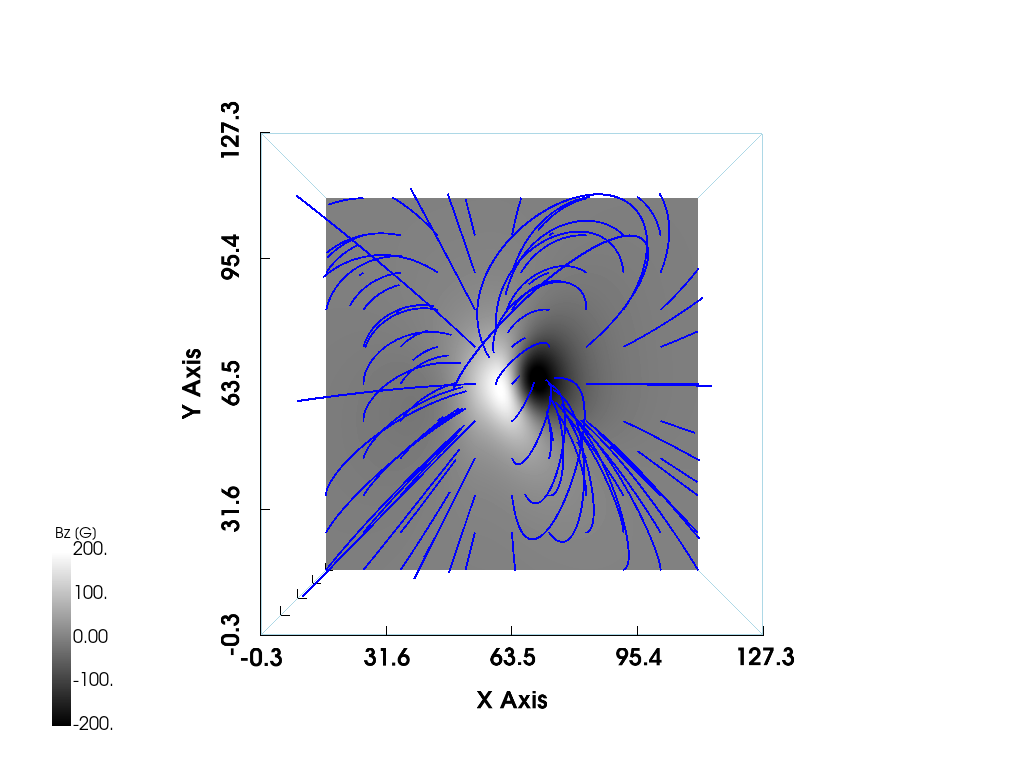

In [ ]:
b_grid.pv_streamline_Bz(camera_position='xy', i_resolution=10, j_resolution=10, vmin=-200, vmax=200)